# Dimensionality reduction 

https://medium.com/@mayureshrpalav/principal-component-analysis-feature-extraction-technique-3f480d7b9697

In [1]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
file_path = "/Users/dionnespaltman/Desktop/V6/merged_df_11-06-2024.csv"

merged_df = pd.read_csv(file_path, sep=',')

if 'Unnamed: 0' in merged_df.columns:
    merged_df.drop(columns=['Unnamed: 0'], inplace=True)
    
display(merged_df)

,ID,Stage,Gender,Date,Location,Condition,Faintness,Dizziness,Weakness,Lightheadedness,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,7,1.0,2,2019-10-28,0,2,1.0,1.0,1.0,2.0,...,-0.585935,0.425279,-0.786613,-0.696839,0.520966,1.700927,1.712210,0.830151,1.741972,1.745418
1,23,1.0,2,2020-08-01,1,2,1.0,2.0,2.0,1.0,...,-0.624259,0.425279,-0.642748,-0.651193,-0.504468,0.296375,0.440450,0.760722,1.243173,0.665506
2,24,1.0,2,2020-01-22,1,2,1.0,1.0,1.0,1.0,...,2.367560,0.425279,3.132948,2.795771,0.129283,-0.279627,-0.201661,0.014352,-0.478731,-0.279724
3,25,1.0,2,2020-05-02,1,2,1.0,1.0,1.0,1.0,...,0.584439,0.425279,0.394186,0.499951,-0.587993,0.094357,0.226315,-0.645230,0.514820,0.302852
4,26,1.0,1,2020-06-02,2,1,2.0,2.0,2.0,1.0,...,-0.517633,0.425279,-0.951628,-0.731221,-1.239117,-0.246984,-0.162414,0.639220,-1.034420,-0.377156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,323,1.0,2,2022-10-26,3,3,1.0,1.0,1.0,1.0,...,-0.804403,-0.162826,-0.846163,-0.845794,-0.142084,0.642278,0.784992,0.864866,0.560518,0.737070
274,325,1.0,2,2022-07-11,3,3,1.0,1.0,1.0,1.0,...,-1.926084,0.425279,-1.669019,-1.846330,-0.586609,-0.362405,-0.303044,0.326786,-0.488608,-0.360082
275,329,1.0,2,2022-11-28,3,3,1.0,1.0,1.0,1.0,...,-0.266200,3.521479,0.610696,0.169932,-2.381393,4.280036,3.507346,0.517718,2.061400,3.218211
276,330,1.0,2,2022-11-30,0,3,1.0,1.0,1.0,1.0,...,-1.889172,-3.328215,-1.706598,-1.845208,-0.958863,-0.594948,-0.603916,-0.315439,-0.770324,-0.661360


# Elbow method

/var/folders/_4/nzq6mygj7j71_l3z_c9kc7wr0000gn/T/ipykernel_37901/1809977946.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


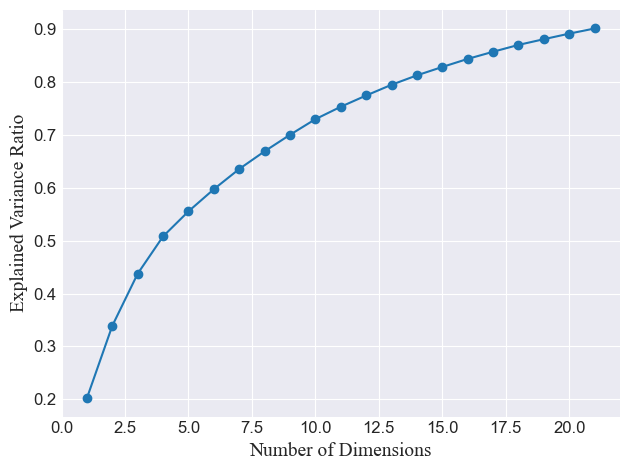

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set the style
plt.style.use('seaborn-darkgrid')

# Assuming merged_df is your dataframe and columns_to_drop contains the columns to drop
columns_to_drop = ['ID', 'Sum_12', 'Sum_4567', 'Sum_456', 'VVR_group', 'Condition', 'Date', 'Gender']
X = merged_df.drop(columns=columns_to_drop)

# Compute PCA for a range of dimensions
max_dimensions = 21
explained_variance_ratios = []

for n_components in range(1, max_dimensions + 1):
    pca = PCA(n_components=n_components)
    pca.fit(X)
    explained_variance_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio against the number of dimensions
plt.plot(range(1, max_dimensions + 1), explained_variance_ratios, marker='o')

# Set labels and title
plt.xlabel('Number of Dimensions', fontsize=14, fontname='Times New Roman')
plt.ylabel('Explained Variance Ratio', fontsize=14, fontname='Times New Roman')
# plt.title('Elbow Method for Dimensionality Reduction', fontsize=16, fontname='Times New Roman')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Increase the font size of ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data

array([[ 0.        , -0.85931155, -0.19316685, ...,  0.82881878,
         1.76000441,  1.75496326],
       [ 0.        ,  0.34719658, -0.19316685, ...,  0.7597971 ,
         1.25970855,  0.67556582],
       [ 0.        ,  0.34719658, -0.19316685, ...,  0.01781405,
        -0.46736148, -0.26921312],
       ...,
       [ 0.        ,  2.76021285, -0.19316685, ...,  0.51822122,
         2.08039063,  3.2270532 ],
       [ 0.        , -0.85931155, -0.19316685, ..., -0.31003893,
        -0.75982958, -0.65066659],
       [ 0.        , -0.85931155, -0.19316685, ...,  4.41794611,
         2.63759844,  4.29946654]])

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
result = pca.transform(scaled_data)
result

array([[ 1.99418234e-02, -8.68693940e-01],
       [-4.71814297e+00,  2.41167319e+00],
       [ 5.00315671e+00, -4.83697024e+00],
       [-2.95652910e+00,  8.73150357e-01],
       [-6.50617952e+00,  4.60518495e+00],
       [-9.00238642e-01,  5.42667921e+00],
       [-6.75584354e-01,  3.53516952e-01],
       [-6.11325862e+00,  4.83848969e+00],
       [ 1.84439736e+00, -4.30353165e+00],
       [-1.56364357e+00, -7.80210604e-01],
       [-1.71984847e-01, -6.71199371e-01],
       [ 1.48086311e+00, -5.24635485e+00],
       [-3.91984507e+00, -1.45281256e+00],
       [-6.72258693e-01, -1.38645657e+00],
       [ 3.11584485e+00,  8.47997557e-01],
       [ 1.19674993e+00,  2.24467922e+00],
       [ 1.12048064e+00,  1.44408097e+00],
       [ 1.59716421e+00, -1.91690029e+00],
       [-2.21733322e+00, -1.24130686e+00],
       [-5.13196125e+00,  2.85930348e-01],
       [-3.17663238e+00, -3.19283040e-01],
       [-3.45099996e-01,  4.45471720e-01],
       [ 3.15753316e+00, -1.47039692e+00],
       [-1.

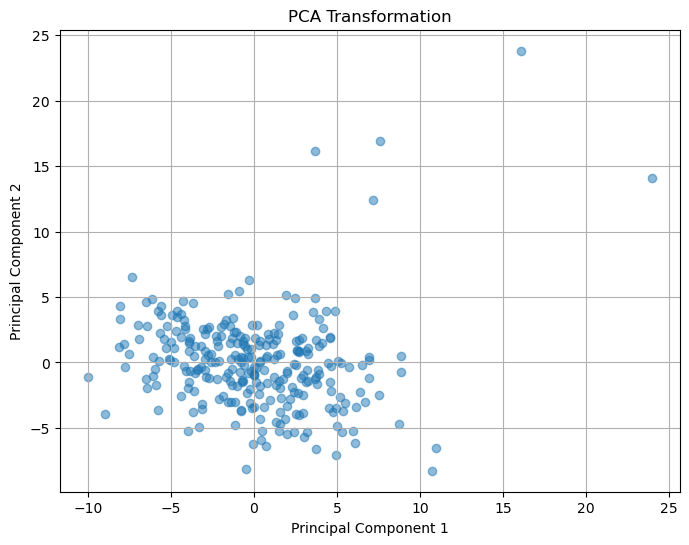

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming scaled_data contains your scaled data

# Perform PCA transformation
pca = PCA(n_components=2)
pca.fit(scaled_data)
result = pca.transform(scaled_data)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(result[:, 0], result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation')
plt.grid(True)
plt.show()


# Select features method 


In [ ]:
import pandas as pd

In [ ]:
extracted_features = pd.read_csv('/Users/dionnespaltman/Desktop/V6/extracted_features_standardized_13-06-2024.csv')

In [ ]:
extracted_features = extracted_features.drop(columns='Unnamed: 0', axis=1)

In [ ]:
display(extracted_features)

,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,AU02_r__maximum,...,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square,ID
0,-0.987362,-0.558011,-0.503412,0.287239,-0.782495,-0.592430,-0.148028,0.398580,0.623460,0.579104,...,0.417897,-0.786464,-0.698066,0.518511,1.705022,1.718466,0.828819,1.760004,1.754963,7
1,-1.322786,-0.489849,-0.418308,0.287239,-0.697981,-0.506626,-1.268123,-0.453214,-0.464279,-0.306494,...,0.417897,-0.642087,-0.652296,-0.507477,0.303495,0.449021,0.759797,1.259709,0.675566,23
2,-0.039783,-0.303053,-0.195997,0.287239,-0.516825,-0.292913,0.604457,0.342417,0.561915,0.704340,...,0.417897,3.147051,2.803989,0.126616,-0.271266,-0.191921,0.017814,-0.467361,-0.269213,24
3,-0.804262,0.077261,0.216735,-0.127717,-0.068765,0.134088,-1.277275,-0.644043,-0.779108,-0.834274,...,0.417897,0.398538,0.501961,-0.591047,0.101912,0.235276,-0.637892,0.529170,0.313085,25
4,-0.006399,0.970401,1.043721,0.287239,0.970037,1.033245,-1.163986,-0.564751,-0.643232,-0.691147,...,0.417897,-0.952067,-0.732541,-1.242522,-0.238694,-0.152746,0.639009,-1.024717,-0.366599,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.562019,1.303243,1.316402,0.287239,1.431121,1.366863,0.061604,0.307805,0.523455,-0.064967,...,-0.171914,-0.846226,-0.847423,-0.144897,0.648653,0.792936,0.863330,0.575006,0.747096,323
274,-0.779947,-0.469749,-0.393645,0.287239,-0.701948,-0.489257,-0.517378,-0.419971,-0.413316,0.212341,...,0.417897,-1.672012,-1.850665,-0.589661,-0.353866,-0.293120,0.328412,-0.477268,-0.349532,325
275,-2.506502,2.570384,2.238981,-0.851229,-2.151953,1.419411,-1.620400,3.669932,3.239724,-0.440675,...,3.523077,0.615819,0.171049,-2.385414,4.278576,3.510335,0.518221,2.080391,3.227053,329
276,-1.523070,-1.469709,-2.039152,-1.702419,-1.550124,-1.928370,-1.366283,-0.963626,-1.440870,-1.746707,...,-3.346483,-1.709725,-1.849540,-0.962117,-0.585909,-0.593444,-0.310039,-0.759830,-0.650667,330


In [ ]:
print(len(extracted_features))

278


In [ ]:
merged_df = pd.read_csv('/Users/dionnespaltman/Desktop/V6/merged_df_11-06-2024.csv')

In [ ]:
merged_df = merged_df.drop(columns='Unnamed: 0', axis=1)

In [ ]:
display(merged_df)

,ID,Stage,Gender,Date,Location,Condition,Faintness,Dizziness,Weakness,Lightheadedness,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,7,1.0,2,2019-10-28,0,2,1.0,1.0,1.0,2.0,...,-0.585935,0.425279,-0.786613,-0.696839,0.520966,1.700927,1.712210,0.830151,1.741972,1.745418
1,23,1.0,2,2020-08-01,1,2,1.0,2.0,2.0,1.0,...,-0.624259,0.425279,-0.642748,-0.651193,-0.504468,0.296375,0.440450,0.760722,1.243173,0.665506
2,24,1.0,2,2020-01-22,1,2,1.0,1.0,1.0,1.0,...,2.367560,0.425279,3.132948,2.795771,0.129283,-0.279627,-0.201661,0.014352,-0.478731,-0.279724
3,25,1.0,2,2020-05-02,1,2,1.0,1.0,1.0,1.0,...,0.584439,0.425279,0.394186,0.499951,-0.587993,0.094357,0.226315,-0.645230,0.514820,0.302852
4,26,1.0,1,2020-06-02,2,1,2.0,2.0,2.0,1.0,...,-0.517633,0.425279,-0.951628,-0.731221,-1.239117,-0.246984,-0.162414,0.639220,-1.034420,-0.377156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,323,1.0,2,2022-10-26,3,3,1.0,1.0,1.0,1.0,...,-0.804403,-0.162826,-0.846163,-0.845794,-0.142084,0.642278,0.784992,0.864866,0.560518,0.737070
274,325,1.0,2,2022-07-11,3,3,1.0,1.0,1.0,1.0,...,-1.926084,0.425279,-1.669019,-1.846330,-0.586609,-0.362405,-0.303044,0.326786,-0.488608,-0.360082
275,329,1.0,2,2022-11-28,3,3,1.0,1.0,1.0,1.0,...,-0.266200,3.521479,0.610696,0.169932,-2.381393,4.280036,3.507346,0.517718,2.061400,3.218211
276,330,1.0,2,2022-11-30,0,3,1.0,1.0,1.0,1.0,...,-1.889172,-3.328215,-1.706598,-1.845208,-0.958863,-0.594948,-0.603916,-0.315439,-0.770324,-0.661360


In [ ]:
from tsfresh import select_features
# from tsfresh.utilities.dataframe_functions import impute

# # Impute missing values 
# extracted_features_au = impute(extracted_features_au)

# Your target variable 
y = merged_df['VVR_group']

print(y)
display(extracted_features)


0      1
1      0
2      0
3      1
4      0
      ..
273    0
274    0
275    0
276    0
277    0
Name: VVR_group, Length: 278, dtype: int64


,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,AU02_r__standard_deviation,AU02_r__maximum,...,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square,ID
0,-0.987362,-0.558011,-0.503412,0.287239,-0.782495,-0.592430,-0.148028,0.398580,0.623460,0.579104,...,0.417897,-0.786464,-0.698066,0.518511,1.705022,1.718466,0.828819,1.760004,1.754963,7
1,-1.322786,-0.489849,-0.418308,0.287239,-0.697981,-0.506626,-1.268123,-0.453214,-0.464279,-0.306494,...,0.417897,-0.642087,-0.652296,-0.507477,0.303495,0.449021,0.759797,1.259709,0.675566,23
2,-0.039783,-0.303053,-0.195997,0.287239,-0.516825,-0.292913,0.604457,0.342417,0.561915,0.704340,...,0.417897,3.147051,2.803989,0.126616,-0.271266,-0.191921,0.017814,-0.467361,-0.269213,24
3,-0.804262,0.077261,0.216735,-0.127717,-0.068765,0.134088,-1.277275,-0.644043,-0.779108,-0.834274,...,0.417897,0.398538,0.501961,-0.591047,0.101912,0.235276,-0.637892,0.529170,0.313085,25
4,-0.006399,0.970401,1.043721,0.287239,0.970037,1.033245,-1.163986,-0.564751,-0.643232,-0.691147,...,0.417897,-0.952067,-0.732541,-1.242522,-0.238694,-0.152746,0.639009,-1.024717,-0.366599,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,0.562019,1.303243,1.316402,0.287239,1.431121,1.366863,0.061604,0.307805,0.523455,-0.064967,...,-0.171914,-0.846226,-0.847423,-0.144897,0.648653,0.792936,0.863330,0.575006,0.747096,323
274,-0.779947,-0.469749,-0.393645,0.287239,-0.701948,-0.489257,-0.517378,-0.419971,-0.413316,0.212341,...,0.417897,-1.672012,-1.850665,-0.589661,-0.353866,-0.293120,0.328412,-0.477268,-0.349532,325
275,-2.506502,2.570384,2.238981,-0.851229,-2.151953,1.419411,-1.620400,3.669932,3.239724,-0.440675,...,3.523077,0.615819,0.171049,-2.385414,4.278576,3.510335,0.518221,2.080391,3.227053,329
276,-1.523070,-1.469709,-2.039152,-1.702419,-1.550124,-1.928370,-1.366283,-0.963626,-1.440870,-1.746707,...,-3.346483,-1.709725,-1.849540,-0.962117,-0.585909,-0.593444,-0.310039,-0.759830,-0.650667,330


In [ ]:
# Selecting important features 
important_features = select_features(extracted_features, y)

# Display important features
display(important_features)

,AU09_r__sum_values,AU25_r__sum_values,AU17_r__maximum,AU20_r__sum_values,AU17_r__sum_values,AU07_r__sum_values
0,-0.130686,0.650718,0.745795,-0.734924,0.039565,-0.481303
1,-1.150928,-1.669944,0.745795,-0.915862,-1.075830,-0.903221
2,-0.004769,1.662993,-0.280757,-0.160261,0.988916,0.333487
3,-0.676957,-1.346679,-0.655530,-0.838420,-0.962471,-1.020238
4,-1.135940,-1.546908,0.419905,-0.926401,-1.320356,-1.294008
...,...,...,...,...,...,...
273,0.807999,-0.455205,0.077721,-0.483595,0.021217,-1.096214
274,-0.725007,-0.190593,-0.182991,-0.941070,-0.341595,-0.631801
275,-2.572580,-2.296765,-0.655530,-1.445636,-2.478922,-1.591790
276,-1.111955,-1.543330,-2.056856,-1.018891,-1.337247,-0.306977
